In [93]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles

In [94]:
os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

In [95]:
outdir = 'results/notebooks/gene_list_comparison/'
os.makedirs(outdir, exist_ok=True)

## First Analysis using PieQTLs WITHOUT SigGWAS Intersection

### Joining the Summary Tables

In [176]:
join_fn = os.path.join(outdir, 'Unique_Genes_And_SNPs.xlsx')
writer = pd.ExcelWriter(join_fn, engine='xlsxwriter', )

In [173]:
# finemapping
finemap_summary = 'results/main/intersect_t1d_gwas_hichip/Unique_Counts_By_Cell_Line.xlsx'
finemap_summary = pd.read_excel(finemap_summary)
finemap_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# colocalization
coloc_summary = 'results/notebooks/colocalization_with_eqtl_catalogue/Unique_Counts_By_Cell_Line.xlsx'
coloc_summary = pd.read_excel(coloc_summary)
coloc_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# pieqtls
pieqtls_summary = 'results/main/gwas_pieqtls/2021_chiou_et_al/2021_chandra_et_al/Unique_Counts_By_Cell_Line.xlsx'
pieqtls_summary = pd.read_excel(pieqtls_summary)
pieqtls_summary.columns = ['Cell Line', 'SNPs', 'Genes']

In [174]:
finemap_summary.to_excel(writer, index=False, sheet_name='finemapping')
coloc_summary.to_excel(writer, index=False, sheet_name='colocalization')
pieqtls_summary.to_excel(writer, index=False, sheet_name='pieqtls')

In [175]:
writer.save()

### Making the venn diagram

In [100]:
finemap_genes = 'results/main/intersect_t1d_gwas_hichip/gene_list.txt'
finemap_genes = pd.read_table(finemap_genes, header=None).squeeze('columns').tolist()

In [101]:
coloc_genes = 'results/notebooks/colocalization_with_eqtl_catalogue/gene_list.txt'
coloc_genes = pd.read_table(coloc_genes, header=None).squeeze('columns').tolist()

In [135]:
pieqtls_genes = 'results/main/gwas_pieqtls/2021_chiou_et_al/2021_chandra_et_al/gene_list.txt'
pieqtls_genes = pd.read_table(pieqtls_genes, header=None).squeeze('columns').tolist()

In [206]:
pieqtls_genes

['ENSG00000003056',
 'ENSG00000026950',
 'ENSG00000073605',
 'ENSG00000089022',
 'ENSG00000090104',
 'ENSG00000103811',
 'ENSG00000105287',
 'ENSG00000112182',
 'ENSG00000112763',
 'ENSG00000124508',
 'ENSG00000124549',
 'ENSG00000134242',
 'ENSG00000137185',
 'ENSG00000137310',
 'ENSG00000137312',
 'ENSG00000137411',
 'ENSG00000139531',
 'ENSG00000142686',
 'ENSG00000146112',
 'ENSG00000160183',
 'ENSG00000172057',
 'ENSG00000173064',
 'ENSG00000175643',
 'ENSG00000178562',
 'ENSG00000182952',
 'ENSG00000183386',
 'ENSG00000183431',
 'ENSG00000186075',
 'ENSG00000186470',
 'ENSG00000187626',
 'ENSG00000187987',
 'ENSG00000196230',
 'ENSG00000197062',
 'ENSG00000197279',
 'ENSG00000197375',
 'ENSG00000198270',
 'ENSG00000199332',
 'ENSG00000201207',
 'ENSG00000204220',
 'ENSG00000204267',
 'ENSG00000204290',
 'ENSG00000204296',
 'ENSG00000204351',
 'ENSG00000204387',
 'ENSG00000204410',
 'ENSG00000204428',
 'ENSG00000204435',
 'ENSG00000204439',
 'ENSG00000204463',
 'ENSG00000204469',


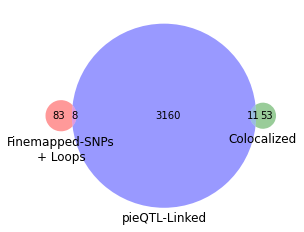

In [136]:
venn3([set(finemap_genes), set(coloc_genes), set(pieqtls_genes)], set_labels=['Finemapped-SNPs\n+ Loops',
                                                                             'Colocalized',
                                                                             'pieQTL-Linked'])

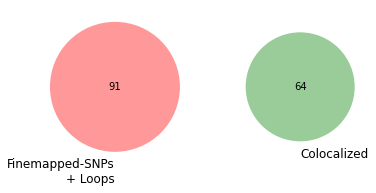

In [137]:
venn2([set(finemap_genes), set(coloc_genes)], set_labels=['Finemapped-SNPs\n+ Loops',
                                                          'Colocalized'])

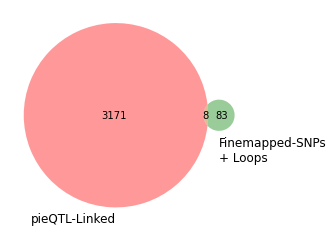

In [138]:
venn2([set(pieqtls_genes), set(finemap_genes)], set_labels=['pieQTL-Linked', 'Finemapped-SNPs\n+ Loops'])

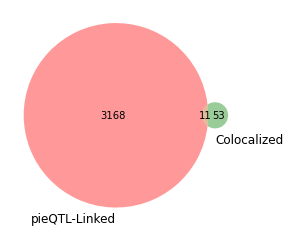

In [139]:
venn2([set(pieqtls_genes), set(coloc_genes)], set_labels=['pieQTL-Linked', 'Colocalized'])

## Second Analysis using PieQTLs WITH SigGWAS Intersection

In [194]:
join_fn = os.path.join(outdir, 'Unique_Genes_And_SNPs.redo.xlsx')
writer = pd.ExcelWriter(join_fn, engine='xlsxwriter')

In [195]:
# finemapping
finemap_summary = 'results/main/intersect_t1d_gwas_hichip/Unique_Counts_By_Cell_Line.xlsx'
finemap_summary = pd.read_excel(finemap_summary)
finemap_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# colocalization
coloc_summary = 'results/main/sgls/combined/Unique_Counts_By_Cell_Line.xlsx'
coloc_summary = pd.read_excel(coloc_summary)
coloc_summary.columns = ['Cell Line', 'SNPs', 'Genes']

# pieqtls
pieqtls_summary = 'results/notebooks/Intersect_T1D_Significant_GWAS_with_PieQTLs/Unique_Counts_By_Cell_Line.xlsx'
pieqtls_summary = pd.read_excel(pieqtls_summary)
pieqtls_summary.columns = ['Cell Line', 'SNPs', 'Genes']

In [196]:
finemap_summary.to_excel(writer, index=False, sheet_name='finemapping')
coloc_summary.to_excel(writer, index=False, sheet_name='colocalization')
pieqtls_summary.to_excel(writer, index=False, sheet_name='pieqtls')

In [197]:
writer.save()

### Making the venn diagram

In [198]:
finemap_genes = 'results/main/intersect_t1d_gwas_hichip/gene_list.txt'
finemap_genes = pd.read_table(finemap_genes, header=None).squeeze('columns').tolist()

In [199]:
coloc_genes = 'results/main/sgls/combined/gene_list.txt'
coloc_genes = pd.read_table(coloc_genes, header=None).squeeze('columns').tolist()

In [200]:
pieqtls_genes = 'results/notebooks/Intersect_T1D_Significant_GWAS_with_PieQTLs/gene_list.txt'
pieqtls_genes = pd.read_table(pieqtls_genes, header=None).squeeze('columns').tolist()

In [201]:
finemap_label = 'Finemapped-SNPs\n+ Loops'
coloc_label = 'Colocalized\n+ Loops'
pieqtl_label = 'pieQTL-Linked \n+ Sig.GWAS'

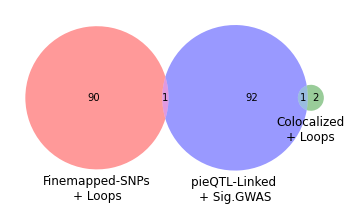

In [202]:
fig, ax = plt.subplots()
venn3([set(finemap_genes), set(coloc_genes), set(pieqtls_genes)], set_labels=[finemap_label,
                                                                             coloc_label,
                                                                             pieqtl_label])

fn = os.path.join(outdir, 'threeway_comparison.png')
fig.savefig(fn, dpi=600)

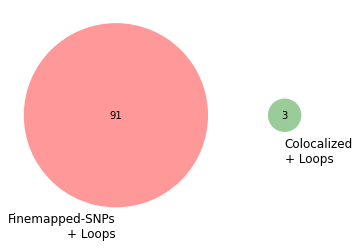

In [203]:
fig, ax = plt.subplots()
venn2([set(finemap_genes), set(coloc_genes)], set_labels=[finemap_label,
                                                          coloc_label])
fn = os.path.join(outdir, 'two_comparison.finemap.coloc.png')
fig.savefig(fn, dpi=600)

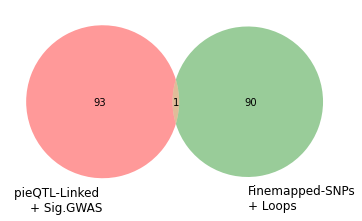

In [204]:
fig, ax = plt.subplots()

venn2([set(pieqtls_genes), set(finemap_genes)], set_labels=[pieqtl_label, finemap_label])

fn = os.path.join(outdir, 'two_comparison.finemap.pieqtl.png')
fig.savefig(fn, dpi=600)

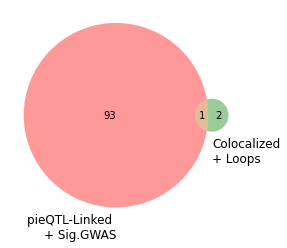

In [205]:
fig, ax = plt.subplots()

venn2([set(pieqtls_genes), set(coloc_genes)], set_labels=[pieqtl_label, coloc_label])

fn = os.path.join(outdir, 'two_comparison.coloc.pieqtl.png')
fig.savefig(fn, dpi=600)